In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [4]:
# Data Preprocessing

# 1. Calculate Tenure (days since signup)
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['Tenure'] = (pd.to_datetime('now') - customers_df['SignupDate']).dt.days

# 2. Aggregate transaction data
transaction_summary = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total amount spent
    'TransactionID': 'count',  # Number of transactions
}).reset_index()

# Merge the customer data and transaction data
customer_data = pd.merge(customers_df, transaction_summary, on='CustomerID', how='left')

# Fill missing values (if any)
customer_data.fillna(0, inplace=True)

In [5]:
# 3. Feature selection
# Using columns: Age, Tenure, TotalValue (Transaction value), TransactionID (Transaction count)
features = customer_data[['Tenure', 'TotalValue', 'TransactionID']]

# 4. Standardizing the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [6]:
# Clustering (K-Means)

# Choose the number of clusters (2 to 10)
n_clusters = 5  # Example: You can try different values here
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9140504085547727


In [7]:
# Visualization

# 1. Use PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Add PCA components to customer data for visualization
customer_data['PCA1'] = pca_components[:, 0]
customer_data['PCA2'] = pca_components[:, 1]

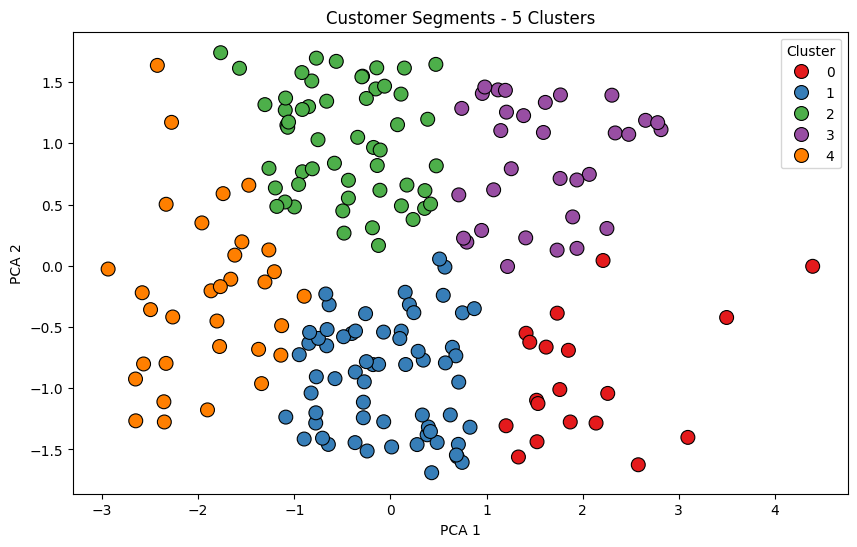

In [8]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=customer_data, s=100, edgecolor='black')
plt.title(f'Customer Segments - {n_clusters} Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

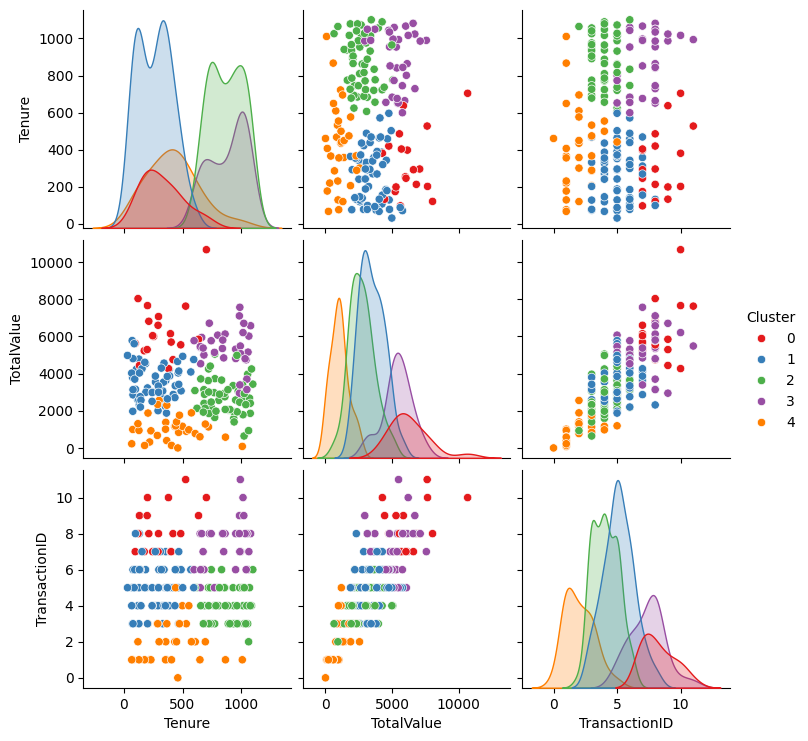

In [9]:
# Optionally, plot pairwise relationships for additional insight
sns.pairplot(customer_data[['Tenure', 'TotalValue', 'TransactionID', 'Cluster']], hue='Cluster', palette='Set1')
plt.show()

# Deliverables: Save the results with cluster assignments
customer_data[['CustomerID', 'Cluster']].to_csv('Customer_Segmentation_Results.csv', index=False)


# Task 3: Customer Segmentation / Clustering

## Objective
Perform customer segmentation using clustering techniques based on both customer profile information (from `Customers.csv`) and transaction data (from `Transactions.csv`). The task involves choosing a clustering algorithm, evaluating the model using the Davies-Bouldin Index (DB Index), and visualizing the results.

## Process

1. **Data Preprocessing**:
   - Loaded and cleaned the `Customers.csv` and `Transactions.csv` datasets.
   - Calculated new features such as `Tenure` (days since signup) for each customer.
   - Aggregated transaction data by customer to create metrics like `TotalValue` (total spending) and `TransactionID` (number of transactions).
   - Merged customer and transaction data for further analysis.

2. **Clustering**:
   - Standardized the selected features (`Tenure`, `TotalValue`, `TransactionID`) using `StandardScaler`.
   - Applied the **K-Means clustering algorithm** to segment the customers into `n_clusters` clusters (set to 5 in this case).
   - Calculated the **Davies-Bouldin Index (DB Index)** to evaluate the quality of the clusters.

3. **Evaluation**:
   - The **DB Index** value was computed to measure cluster separation, with a lower value indicating better clustering quality.

4. **Visualization**:
   - Used **PCA** to reduce the dimensionality of the data to 2D for visualization.
   - Plotted the clusters using a scatter plot and a pairwise relationships plot to examine the customer segments.

## Deliverables

- **Customer Segmentation Results**: A CSV file (`Customer_Segmentation_Results.csv`) containing the `CustomerID` and their assigned cluster.
- **Clustering Metrics**: The DB Index value is provided as a measure of clustering quality.

## Example Insights
- Customer segments are identified based on spending behavior and frequency of transactions.
- The clusters can be used to tailor marketing strategies, develop personalized offers, and enhance customer engagement.

## Next Steps
- Analyze each cluster to determine customer characteristics and refine marketing strategies.
- Experiment with different clustering algorithms or the number of clusters to optimize segmentation for targeted actions.
